# Bias-Variance Tradeoff

Sections:
* Fundamental structure of test statistics
* Types of models
* Approaches to learning models
* Bias-variance tradeoff

This lecture draws from Chapter 2 of James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). "An introduction to statistical learning: with applications in r."

---
# 1. The fundamental structure of test statistics
<br>
All test statistics (e.g., regression, t-tests, ANOVA) have a common fundamental structure.

$$ Y=f(X) $$

Let us break down the component parts of this equation.

* **Input variables ($X$): ** These are also known as _predictor variables_, _independent variables_, or _features_, and reflect the variables of control.

* **Output variables ($Y$): ** These are also known as _response variables_, _dependent variables_, or _outcomes_ and reflect the variables being observed.

* **Functional relationship ($f()$): ** This is the model that relates $X$ to $Y$.

In a perfect world this form would explain all of the relationship between $X$ and $Y$. However, these models aren't perfect, so we add in an additional term ($\epsilon$) to account for the other parts of $Y$ not explained by $f(X)$.

$$ Y=f(X) + \epsilon $$


Let's consider an example

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


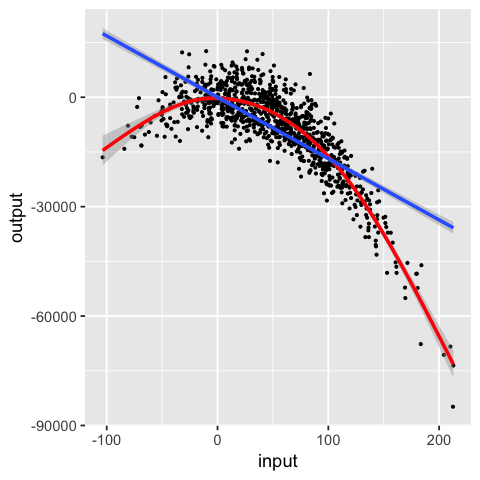

In [1]:
# Let's use ggplot2 to show the results
library(ggplot2)

# Restrict plotting dimensions
options(repr.plot.width=4, repr.plot.height=4)

# Generate the distributions as data frames
beta1 = 0.4
beta2 = -1.7
n = 1000
mu_a = 50  # mean
mu_b = 0 # mean
sigma_a = 50 # standard deviation
sigma_b = 5000 # standard deviation

# Simulate your distributions
input = rnorm(n, mean=mu_a, sd=sigma_a)
output = beta1*input+beta2*input^2 + rnorm(n, mean=mu_b, sd=sigma_b)

# Plot both the ploynomial and linear trend.
df = data.frame(input, output)
colnames(df)=c('input','output')
ggplot(df, aes(x=input, y=output))+geom_point(size=0.5)+geom_smooth(color="red")+geom_smooth(method="lm")

Notice in this example that $f()$ takes the specific form:

$$ Y = 0.4 \cdot X + -0.4 \cdot X^2 + N(0,1500) $$

The simple linear trend (blue line in figure above) picks up on the  general trend, but fails to capture the nuance of the observed trend. We'll dig deeper into this issue later.

---
Note as I said above, **every** test statistic can be framed in this form. For example, consider a _t-test_. 

$$ t = \frac{E(X_a) - E(X_b) }{\sigma_{ab}} $$

Here you take the mean of a set of observations from Group A ($E(X_a)$) and a mean of observations from Group B ($E(X_b)$) and divide them by their pooled variance ($\sigma_{ab}$). Here the normalized difference is the _functional relationship_ when the data is organized according to this data table.

| Observation (Y) | Condition (X) |
| ------------|:---------:|
| 100         |     A     |
| 223         |     B     |
| 341         |     A     |
| 482         |     B     |

In this case the _predictor ($X$)_ for the _observations ($Y$)_ is group identification. 

---

## Dimensions

For the remainder of this course we will talk about $X$ and $Y$ as being vectors and matrices. In most cases, $Y$ will be described as a column vector and $X$ can either take the form of another column vectore or (more often) a matrix. But they should have consistent relationships in their dimensions.

* **n:** number of observations (rows)
* **p:** number of features (columns)

Think of $X$ and $Y$ as being a subset of variables from your cleaned data table such that they both have the same number of rows. Thus we say that the _dimensionality_ of a model is defined by the ratio of **n** to **p**. We will explore the issue of dimensionality later in the semester.



---
# 2. Types of models

<br>
The goal of statistics and data science is to understand the form of $f()$. Estimating this function serves one of two purposes.

* **Prediction:** Characterize the probabilty of observing a given entry in $Y$ from a given entry in $X$. Here the goal is to _maximize control_ over $Y$.

* **Inference:** Understand how $Y$ changes as a function of $X$ (i.e., develop a mechanistic understanding of $f()$. 

It is important to point out that _prediction_ and _inference_ serve two different purposes, so it is best to know what you are trying to get out of your data before trying to solve a particular $Y=f(X)$ relationship.

---

<br>
There are two general classes of models we will learn in this course, depending on whether $Y$ is a vector composed of quantitative or qualitative data.

* **Regression:** When $Y$ is _quantitative_.
* **Classification:** When $Y$ is _qualitative_.

The form of $X$ isn't critical for determining the type of model being learned. It only depends on $Y$.

(_Side Note_: You may have heard of regression models that are used for binary output data (e.g., logistic regression). For the sake of keeping things consistent here, we will refer to that as a classification model and use _regression_ strictly for when $Y$ is quantitative.)

---
The example plotted above shows a case of a _regression_ model. Let's tweak this to being a classification model using the same input variables.


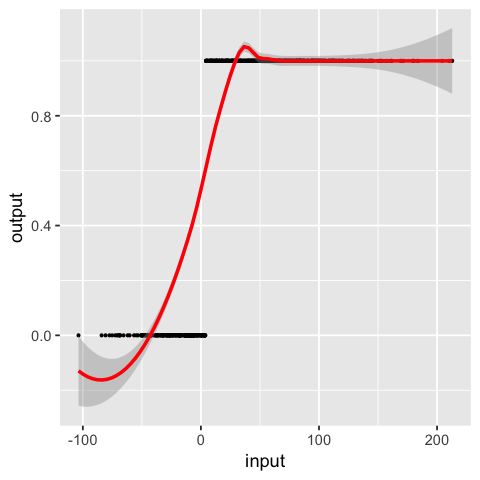

In [2]:
# Continuing the previous example to a classification context. 
# Keeping the same input variables.
theshold = 4
output_fcn = 10 / (1+100*exp(-input))
output = matrix(0,n,1);
output[output_fcn > theshold]=1

# Let's first plot this continuous relationship
df = data.frame(input, output)
colnames(df)=c('input','output')
ggplot(df, aes(x=input, y=output))+geom_point(size=0.5)+geom_smooth(method="loess",color="red")


As you can see, there are two discrete categories of $Y$ (0 and 1) and a clear transition point along the input values that shifts $Y$ from 0 to 1. This is a classic classification model (i.e. use $X$ to classify the category of $Y$).


---
# 3. Form of $f()$

<br>
A major goal of statistics is to estimate the best $f()$ (which is usually denoted as $\hat{f}()$). There are two general ways you can take to structure (or form) $f()$. 

* **Parametric Methods:** Approaches that assume the functional form or shape of $f()$ and thus can describe the $Y=f(X)$ relationships using a small number of paremeters.

Examples of parametric statistics are least-squares regression, t-tests,and ANOVAs. Here your goal is to learn just a few parameters rather than an entire data set.

<br>

* **Nonparametric Methods:** Approaches that do not make explicit assumptions about the functional form of $f()$. Estimate $f()$ that gets as close to the data as possible. 

Examples of non-parametric approaches include kNN regression, kernel regression, etc. We will explore these in more detail later.

<br>

---
## Supervised vs. unsupervised learning

Parametric and non-parametric approaches really boil down to your assumptions about $f()$. Now there are two ways to _learn_ $f()$. 

* **Unsupervised learning:** Use the data ($X$) to identify the pattern structure within it (e.g., clustering, PCA). In this case you just consider the observations of $X$ without considering the observations of $Y$. (The name for this method arises from the fact that there is no response variable that can supervise your analysis/outcomes. In this case it the fundamental form a statistical model boils down to just $f(X)$.)

* **Supervised learning:** For each observation of the predictor variable ($X$), there is a corresponding response measure ($Y$). Thus, fit the model that relates $X$ directly to $Y$. 

<br>
Supervised and supervised learning approaches define the class of problem, but you can think of them in the context of the general form of a test statistic. Unsupervised methods try to identify the structure of $X$ itself in a way that is _meaningful_ for understanding $Y$, but not essential to that understanding. Supervised methods focuse squarely on understanding $X$ in the context of its relationship to $Y$.

<Br>
    
---
### Two types of error

Regardlesss of whether you are using a parameteric or non-parametric methods, if you are using a supervised leraning approach, the goal is to minimize the error in your model. What does that mean? Well let's say you've learned a particular model $\hat{f}(X)$. Remember, the assumption is that in the real world $Y$ is completely described by $f(X)+\epsilon$. So to test how well $\hat{f}(X)$ explains $Y$ boils down to this:

$$E(Y-\hat{f}(X))^2 = E[f(X)+\epsilon - \hat{f}(X)]^2 = [f(X)-\hat{f}(X)]^2+Var(\epsilon)$$

Note that this equation breaks down into two parts:

* **Reducible errror ($[f(X)-\hat{f}(X)]^2$):** This is error that can be explained by building a better $\hat{f}(x)$.

* **Irreducible error ($Var(\epsilon)$):** Error hat cannot be explained by $f(X)$ (i.e., noise)
 
A model that perfectly explains all of Y has no irreducible error. So that $E(Y-\hat{f}(X))^2=0$. 
 

# 4. Bias-Variance tradeoff

In most problems of solving for $Y=f(X)$ there is a tradeoff: a model can be highly _interpretable_, but not as accurate, or highly _complex and accurate_, but not as interpretable. Most methods we will learn fall along this dimension of flexiblity and interpretability.

![Flexibility vs. Interpretability](imgs/L6FlexibilityInterpretability.png)


In this case, flexibility is defined by the degrees of freedom of the model. More degrees of freedom, greater flexibility; however, you also suffer a greater chance of “over-fitting” to training data

For understanding the relationship between _flexibility_ and _interpretability_ it is important to think in the context of building a predictive model. Let's say that you learn a particular $\hat{f}(X)$. The data set that you learned the model on is called the _training_ data (i.e., a specific pair of $X$ and $Y$ that you use to learn $\hat{f}$). In the prediction context, you can now see how well your $\hat{f}$ is at predicting a new set of data $Y^*$ and $X^*$. We call these new data sets the _test_ data. 

Let's say we fit a series of models to a particular training set, with each model haveing different levels of complexity (aka- flexibility). This is shown in the plot on the left.

![Train vs. Test](imgs/L6TrainVsTest.png)


The simplest model is shown in the orange line ($y=\beta_0 + \beta_1x$). This has the lowest number of degrees of freedom (e.g., 2 regression coefficients). The next most complex model is a polynomial model in the blue line ($y=\beta_0 + \beta_1x + ... + \beta_5x^5$). Note here you have more parameters (4 instead of 2), so this model can capture more of the data better. Finally there's the really complex model shown in green ($y = \beta_0 + \beta_1x + ... + \beta_px^p$). Notice that this model captures a lot of varianc in the data.

Now let's compare the _fit_ of these models to the response variable ($Y$) in two scenarios: how well they fit the _training_ data and how well they fit the _test_ data. This is shown in the right plot above. Notice that as you increase model complexity, the model fit error keeps decreasing for the training data set. Thus the more complex models are affording better fits on the nuances of the data you are training on. 

However, the same pattern isn't true for the case where you look at how well $\hat{f}$ fits the new test data set (i.e., the data set the model wasn't learned on). Here we see that there is a sweet spot. The simple model has a lot of residual error because it's well... too simple. We say that it has high _bias_, in that it is inflexible to a lot of deivations and only reflects stable trends. The most complex model has a lot of error too, because it started fitting the idiosyncrasies of the trained data set and has trouble generalizing. It's the middle model (the "goldilocks" model) that has both low training error and testing error. 

<br>

---

<br>
The previous example highlights a phenonemon known as the _bias-variance tradeoff_.

* **Bias-Variance tradeoff:** Low variance models will also have low flexibility (i.e., high bias) and vice versa. 

So if you want a very flexible model, they will be relatively stable but not capture nuanced variability in your data set. While having too much flexiblity means that you can't generalize your model to other data sets. In the example above, the second model has the optimal balance of bias and variance (aka- flexibility)

We can understand the bias-variance tradeoff by taking another look at the squared error function described above.

$$ E(Y-\hat{f}(X))^2 = Var(\hat{f}(X) + Bias(\hat{f}(X))^2 + Var(\epsilon) $$

<br>
Thus the reducible error is now accounting for two components:

* **$Var(\hat{f}(X))$:** The amount by which $\hat{f}$ would change if we estimated it using a different training set. This is linked to the idea of _reliability_. More flexible models have higher $Var(\hat{f}(X))$.

* **$Bias(\hat{f}(X))$:** Error that is introduced by approximation constraints. This is linked to the idea of validity (i.e., how well your model generalizes). 

<br>
The fundamental goal of data analytics is to find the best $\hat{f}(X)$ that maximizes this bias-variance tradeoff. This goal will remain the focus of our discussions for the remainder of the coruse.

